In [91]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras

from sklearn.model_selection import train_test_split

print(f"Tensorflow version: {tf.version.VERSION}")
tf.config.experimental.list_physical_devices('GPU')

Tensorflow version: 2.8.0


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [92]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, BatchNormalization, Dropout
from tensorflow.keras import optimizers, losses, metrics

In [93]:
UFC_Data = pd.read_csv('./ufc-master.csv')
UFC_Data.head()

,R_fighter,B_fighter,R_odds,B_odds,R_ev,B_ev,date,location,country,Winner,...,finish_details,finish_round,finish_round_time,total_fight_time_secs,r_dec_odds,b_dec_odds,r_sub_odds,b_sub_odds,r_ko_odds,b_ko_odds
0,Uriah Hall,Sean Strickland,175,-210,175.000000,47.619048,2021-07-31,"Las Vegas, Nevada, USA",USA,Blue,...,NaN,5.0,5:00,1500.0,650.0,225.0,2500.0,800.0,275.0,165.0
1,Cheyanne Buys,Gloria de Paula,-145,125,68.965517,125.000000,2021-07-31,"Las Vegas, Nevada, USA",USA,Red,...,Kick,1.0,1:00,60.0,100.0,200.0,800.0,1400.0,900.0,900.0
2,Niklas Stolze,Jared Gooden,-180,155,55.555556,155.000000,2021-07-31,"Las Vegas, Nevada, USA",USA,Blue,...,Punch,1.0,1:08,68.0,180.0,300.0,600.0,1200.0,300.0,600.0
3,Collin Anglin,Melsik Baghdasaryan,135,-155,135.000000,64.516129,2021-07-31,"Las Vegas, Nevada, USA",USA,Blue,...,Kick,2.0,1:50,410.0,240.0,250.0,1000.0,850.0,650.0,225.0
4,Bryan Barberena,Jason Witt,-265,215,37.735849,215.000000,2021-07-31,"Las Vegas, Nevada, USA",USA,Blue,...,NaN,3.0,5:00,900.0,300.0,500.0,550.0,750.0,120.0,850.0


In [94]:
#Where did i get this? from first project
def Categorize_Winner(df):
    df['Winner_Categorized'] = df['Winner'].astype('category')

    cat_columns = df.select_dtypes(['category']).columns
    df[cat_columns] = df[cat_columns].apply(lambda x: x.cat.codes)
    return df

UFC_Data = Categorize_Winner(UFC_Data)
UFC_Data.head()

,R_fighter,B_fighter,R_odds,B_odds,R_ev,B_ev,date,location,country,Winner,...,finish_round,finish_round_time,total_fight_time_secs,r_dec_odds,b_dec_odds,r_sub_odds,b_sub_odds,r_ko_odds,b_ko_odds,Winner_Categorized
0,Uriah Hall,Sean Strickland,175,-210,175.000000,47.619048,2021-07-31,"Las Vegas, Nevada, USA",USA,Blue,...,5.0,5:00,1500.0,650.0,225.0,2500.0,800.0,275.0,165.0,0
1,Cheyanne Buys,Gloria de Paula,-145,125,68.965517,125.000000,2021-07-31,"Las Vegas, Nevada, USA",USA,Red,...,1.0,1:00,60.0,100.0,200.0,800.0,1400.0,900.0,900.0,1
2,Niklas Stolze,Jared Gooden,-180,155,55.555556,155.000000,2021-07-31,"Las Vegas, Nevada, USA",USA,Blue,...,1.0,1:08,68.0,180.0,300.0,600.0,1200.0,300.0,600.0,0
3,Collin Anglin,Melsik Baghdasaryan,135,-155,135.000000,64.516129,2021-07-31,"Las Vegas, Nevada, USA",USA,Blue,...,2.0,1:50,410.0,240.0,250.0,1000.0,850.0,650.0,225.0,0
4,Bryan Barberena,Jason Witt,-265,215,37.735849,215.000000,2021-07-31,"Las Vegas, Nevada, USA",USA,Blue,...,3.0,5:00,900.0,300.0,500.0,550.0,750.0,120.0,850.0,0


In [95]:
#UFC_Data.isnull().sum()
df = pd.DataFrame(UFC_Data.dropna(axis='columns'))
df.head()


,R_fighter,B_fighter,R_odds,B_odds,R_ev,B_ev,date,location,country,Winner,...,height_dif,reach_dif,age_dif,sig_str_dif,avg_sub_att_dif,avg_td_dif,empty_arena,constant_1,better_rank,Winner_Categorized
0,Uriah Hall,Sean Strickland,175,-210,175.000000,47.619048,2021-07-31,"Las Vegas, Nevada, USA",USA,Blue,...,2.54,-7.62,-7,1.98,0.1,0.74,1,1,Red,0
1,Cheyanne Buys,Gloria de Paula,-145,125,68.965517,125.000000,2021-07-31,"Las Vegas, Nevada, USA",USA,Red,...,5.08,10.16,0,-0.93,1.0,-0.48,1,1,neither,1
2,Niklas Stolze,Jared Gooden,-180,155,55.555556,155.000000,2021-07-31,"Las Vegas, Nevada, USA",USA,Blue,...,0.00,5.08,-1,2.75,0.0,0.03,1,1,neither,0
3,Collin Anglin,Melsik Baghdasaryan,135,-155,135.000000,64.516129,2021-07-31,"Las Vegas, Nevada, USA",USA,Blue,...,0.00,-2.54,1,1.51,0.0,-2.75,1,1,neither,0
4,Bryan Barberena,Jason Witt,-265,215,37.735849,215.000000,2021-07-31,"Las Vegas, Nevada, USA",USA,Blue,...,-5.08,-5.08,2,-2.63,0.9,6.25,1,1,neither,0


In [96]:
#Where did i get this? From first project.
non_num = []
for col in df:
    if df[col].dtypes != "float64" and df[col].dtypes != "int64":
        non_num.append(col)
non_num.remove("Winner_Categorized")
df = pd.DataFrame(df.drop(columns = non_num))
df.head()


,R_odds,B_odds,R_ev,B_ev,no_of_rounds,B_current_lose_streak,B_current_win_streak,B_draw,B_longest_win_streak,B_losses,...,sub_dif,height_dif,reach_dif,age_dif,sig_str_dif,avg_sub_att_dif,avg_td_dif,empty_arena,constant_1,Winner_Categorized
0,175,-210,175.000000,47.619048,5,0,4,0,4,3,...,1,2.54,-7.62,-7,1.98,0.1,0.74,1,1,0
1,-145,125,68.965517,125.000000,3,1,0,0,1,1,...,0,5.08,10.16,0,-0.93,1.0,-0.48,1,1,1
2,-180,155,55.555556,155.000000,3,2,0,0,0,2,...,0,0.00,5.08,-1,2.75,0.0,0.03,1,1,0
3,135,-155,135.000000,64.516129,3,0,1,0,1,0,...,0,0.00,-2.54,1,1.51,0.0,-2.75,1,1,0
4,-265,215,37.735849,215.000000,3,1,0,0,1,2,...,0,-5.08,-5.08,2,-2.63,0.9,6.25,1,1,0


In [97]:
n = 100
temp_ds = df[:n]


In [98]:
train_df, test_df = train_test_split(df, test_size = 0.3)
test_df, validation_df = train_test_split(test_df, test_size = 0.5)
print("Training Dataset Shape: ", train_df.shape)
print("Validation Dataset Shape: ", validation_df.shape)
print("Test Dataset Shape: ", test_df.shape)

Training Dataset Shape:  (3369, 59)
Validation Dataset Shape:  (722, 59)
Test Dataset Shape:  (722, 59)


In [99]:
#Class for him is Winner_Categorized for us
train_stats = train_df.describe()
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
R_odds,3369.0,-115.156129,269.440214,-1700.000000,-255.000000,-150.000000,127.000000,775.000000
B_odds,3369.0,64.096468,249.311093,-1200.000000,-145.000000,130.000000,220.000000,1200.000000
R_ev,3369.0,95.792104,85.015850,5.882353,39.215686,66.666667,127.000000,775.000000
B_ev,3369.0,166.033732,136.842797,8.333333,68.965517,130.000000,220.000000,1200.000000
no_of_rounds,3369.0,3.174236,0.559607,3.000000,3.000000,3.000000,3.000000,5.000000
B_current_lose_streak,3369.0,0.485307,0.775501,0.000000,0.000000,0.000000,1.000000,6.000000
B_current_win_streak,3369.0,0.861680,1.310195,0.000000,0.000000,0.000000,1.000000,12.000000
B_draw,3369.0,0.008311,0.090799,0.000000,0.000000,0.000000,0.000000,1.000000
B_longest_win_streak,3369.0,1.760166,1.902166,0.000000,0.000000,1.000000,3.000000,17.000000
B_losses,3369.0,1.727812,2.084854,0.000000,0.000000,1.000000,3.000000,15.000000


In [100]:
train_df.shape

(3369, 59)

In [101]:
Y_train = train_df.pop('Winner_Categorized')
Y_validation = validation_df.pop('Winner_Categorized')
Y_test = test_df.pop('Winner_Categorized')

In [102]:
train_stats = train_stats.transpose()
train_stats = train_stats.drop(columns = ['Winner_Categorized'])
train_stats = train_stats.transpose()

def norm(x):
    return (x - train_stats['mean']) / train_stats['std']

normalized_train_df = norm(train_df)
normalized_test_df = norm(test_df)
normalized_validation_df = norm(validation_df)

In [103]:
print("Train/Validation/Test Features")
print("Train: ", normalized_train_df.shape)
print("Validation: ", normalized_validation_df.shape)
print("Test: ", normalized_test_df.shape)

print("\nTrain/Validation/Test Labels")
print("Train: ", Y_train.shape)
print("Validation: ", Y_validation.shape)
print("Test: ", Y_test.shape)

Train/Validation/Test Features
Train:  (3369, 58)
Validation:  (722, 58)
Test:  (722, 58)

Train/Validation/Test Labels
Train:  (3369,)
Validation:  (722,)
Test:  (722,)


In [108]:
def build_NN_model(model_optimizer, model_loss, first_HL_node_count, second_HL_node_count = 4, second_HL = False):

    #This is the Keras Model 
    model = Sequential()

    model.add(Dense(first_HL_node_count, input_shape = (normalized_train_df.shape[1],), activation = 'relu'))

    if second_HL:
        model.add(Dense(second_HL_node_count, Activation('relu')))

    model.add(Dense(1)) 

    model.compile(
        optimizer = model_optimizer,
        loss = model_loss,
        metrics = ['accuracy']
    )

    return model

In [109]:
model_loss = losses.BinaryCrossentropy(from_logits = True)
learning_rate = 0.01
model_optimizer = optimizers.SGD(learning_rate = learning_rate)
first_HL_node_count = 16
second_HL = False

model = build_NN_model(model_optimizer=model_optimizer, model_loss=model_loss, first_HL_node_count=first_HL_node_count, second_HL=second_HL)
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 16)                944       
                                                                 
 dense_5 (Dense)             (None, 1)                 17        
                                                                 
Total params: 961
Trainable params: 961
Non-trainable params: 0
_________________________________________________________________


In [112]:
EPOCHS = 100
batch_sz = 100

In [113]:
with tf.device('/GPU:0'):
    history = model.fit(
        normalized_train_df,
        Y_train,
        batch_size = batch_sz,
        epochs = EPOCHS,
        verbose = 1,
        shuffle = True,
        steps_per_epoch = int(normalized_train_df.shape[0] / batch_sz),
        validation_data = (normalized_validation_df, Y_validation),
    )

Epoch 1/100
33/33 [==============================] - 1s 22ms/step - loss: nan - accuracy: 0.4279 - val_loss: nan - val_accuracy: 0.3740
Epoch 2/100
33/33 [==============================] - 1s 19ms/step - loss: nan - accuracy: 0.4231 - val_loss: nan - val_accuracy: 0.3740
Epoch 3/100
33/33 [==============================] - 1s 19ms/step - loss: nan - accuracy: 0.4240 - val_loss: nan - val_accuracy: 0.3740
Epoch 4/100
33/33 [==============================] - 1s 22ms/step - loss: nan - accuracy: 0.4240 - val_loss: nan - val_accuracy: 0.3740
Epoch 5/100
33/33 [==============================] - 1s 16ms/step - loss: nan - accuracy: 0.4221 - val_loss: nan - val_accuracy: 0.3740
Epoch 6/100
33/33 [==============================] - 1s 15ms/step - loss: nan - accuracy: 0.4252 - val_loss: nan - val_accuracy: 0.3740
Epoch 7/100
33/33 [==============================] - 0s 15ms/step - loss: nan - accuracy: 0.4225 - val_loss: nan - val_accuracy: 0.3740
Epoch 8/100
33/33 [=============================

KeyboardInterrupt: 

In [116]:
print('Summary of results after each epoch:')
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
print(hist)

Summary of results after each epoch:
   loss  accuracy  val_loss  val_accuracy  epoch
0   NaN  0.424242       NaN      0.373961      0
1   NaN  0.425818       NaN      0.373961      1
2   NaN  0.426736       NaN      0.373961      2
3   NaN  0.419088       NaN      0.373961      3
4   NaN  0.432854       NaN      0.373961      4


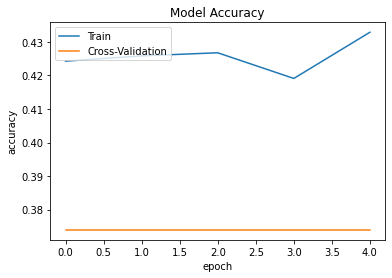

In [117]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Train', 'Cross-Validation'], loc = 'upper left')
plt.show()

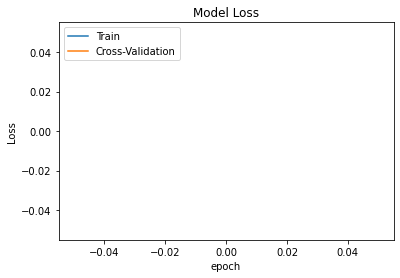

In [118]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Cross-Validation'], loc = 'upper left')
plt.show()